In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [52]:
# Importing Data Set
data = pd.read_csv('train.csv')
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exercise 4 : Linear Regression

## Problem 1 : Predicting SalePrice using GrLivArea
### Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
### In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.
#### Hints and Pointers
#### o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.
#### o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too.
#### o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors.

#### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

In [3]:
subset = data[['SalePrice', 'GrLivArea']]

In [4]:
X = subset[ 'GrLivArea']
y = subset[ 'SalePrice']

In [5]:
#importing the necessary functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)



Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [31]:
# Create a Linear Regression object
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

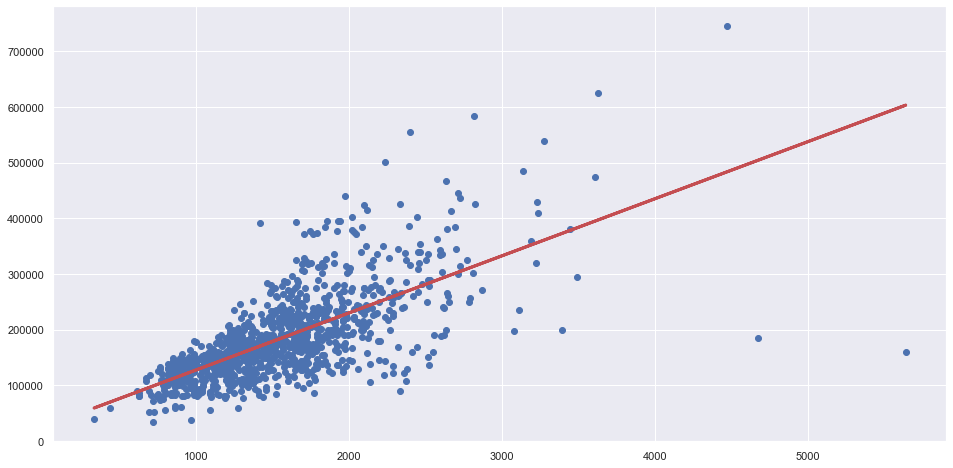

Intercept of Regression 	: b =  [24899.74815734]
Coefficients of Regression 	: a =  [[102.48895892]]



In [21]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

#### b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

In [24]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Goodness of Fit of Model(Train Dataset)
Explained Variance (R^2) 	: 0.483931586143035
Mean Squared Error (MSE) 	: 3078116053.85812
Root Mean Squared Error (RMSE) 	: 55480.771929183895
Goodness of Fit of Model(Test Dataset)
Explained Variance (R^2) 	: 0.5542632452871118
Mean Squared Error (MSE) 	: 3418946311.1808057
Root Mean Squared Error (RMSE) 	: 58471.756525529534


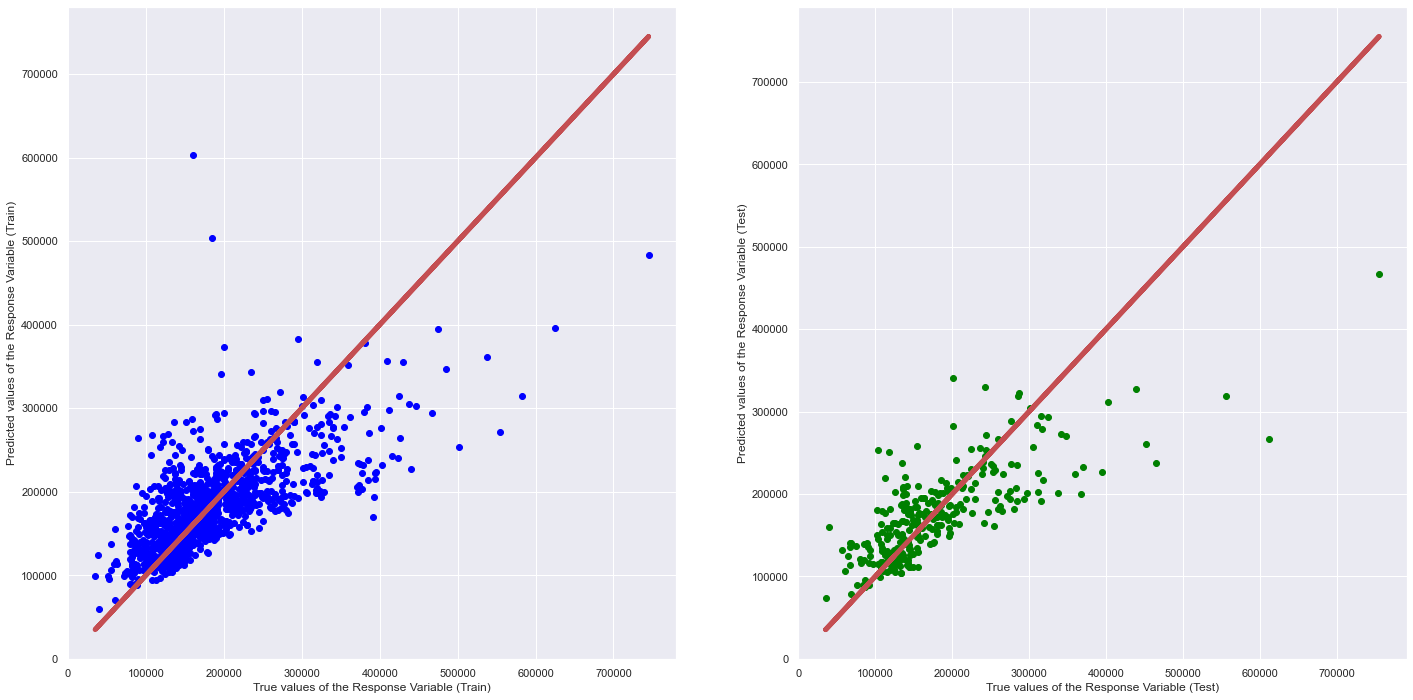

In [30]:
# Mean Squared Error (MSE) Function
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Check the Goodness of Fit on Train Data
mse_train = mean_sq_err(y_train, y_train_pred)
print("Goodness of Fit of Model(Train Dataset)")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mse_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse_train))

# Check the Goodness of Fit on Test Data
mse_test = mean_sq_err(y_test, y_test_pred)
print("Goodness of Fit of Model(Test Dataset)")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mse_test)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse_test))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Problem 2 : Predicting SalePrice using Other Variables
#### Hints and Pointers
#### o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.
#### o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.
#### Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

In [88]:
# Linear Regression Function
def conduct_linear_regression(X_var, y_var):
    X1_train, X1_test, y1_train, y1_test = train_test_split(X_var, y_var, test_size=0.2, random_state=42)
    linreg = LinearRegression()
    linreg.fit(X1_train, y1_train)
    # Formula for the Regression line
    regline_x = X1_train
    regline_y = linreg.intercept_ + linreg.coef_ * X1_train

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    
    y1_train_pred = linreg.predict(X1_train)
    y1_test_pred = linreg.predict(X1_test)

    # Check the Goodness of Fit on Train Data
    mse_train1 = mean_sq_err(y1_train, y1_train_pred)
    print("Goodness of Fit of Model(Train Dataset)")
    print("Explained Variance (R^2) \t:", linreg.score(X1_train, y1_train))
    print("Mean Squared Error (MSE) \t:", mse_train1)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse_train1))

    # Check the Goodness of Fit on Test Data
    mse_test1 = mean_sq_err(y1_test, y1_test_pred)
    print("Goodness of Fit of Model(Test Dataset)")
    print("Explained Variance (R^2) \t:", linreg.score(X1_test, y1_test))
    print("Mean Squared Error (MSE) \t:", mse_test1)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse_test1))

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y1_train, y1_train_pred, color = "blue")
    axes[0].plot(y1_train, y1_train, 'r-', linewidth = 5)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y1_test, y1_test_pred, color = "green")
    axes[1].plot(y1_test, y1_test, 'r-', linewidth = 5)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()
    
    return

In [89]:
# Make a new subset with the new variables
subset1 = data[['SalePrice', 'TotalBsmtSF']]
X1 = subset1[['TotalBsmtSF']]
y1 = subset1[['SalePrice']]
subset2 = data[['SalePrice', 'GarageArea']]
X2 = subset2[['GarageArea']]
y2 = subset2[['SalePrice']]


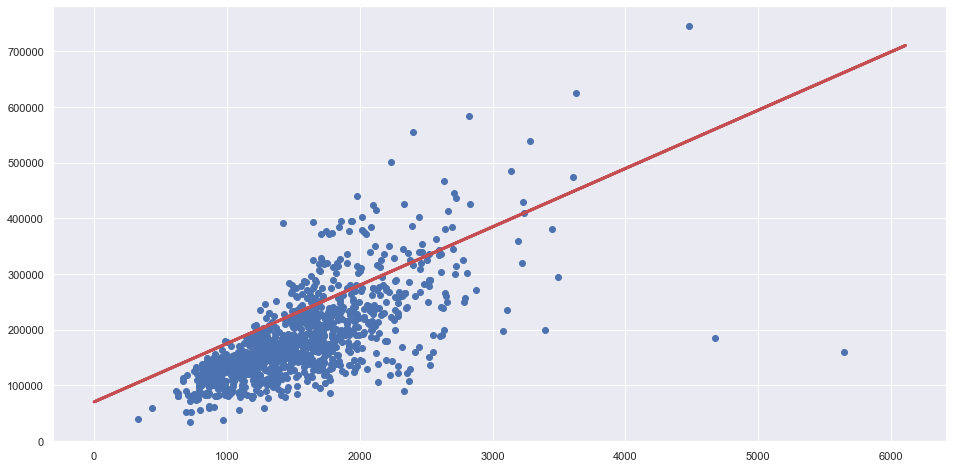

Intercept of Regression 	: b =  [70161.50459652]
Coefficients of Regression 	: a =  [[104.8060222]]

Goodness of Fit of Model(Train Dataset)
Explained Variance (R^2) 	: 0.35732403271537017
Mean Squared Error (MSE) 	: 3833273184.736912
Root Mean Squared Error (RMSE) 	: 61913.43299104736
Goodness of Fit of Model(Test Dataset)
Explained Variance (R^2) 	: 0.4306435638282802
Mean Squared Error (MSE) 	: 4367149593.598606
Root Mean Squared Error (RMSE) 	: 66084.41263716131


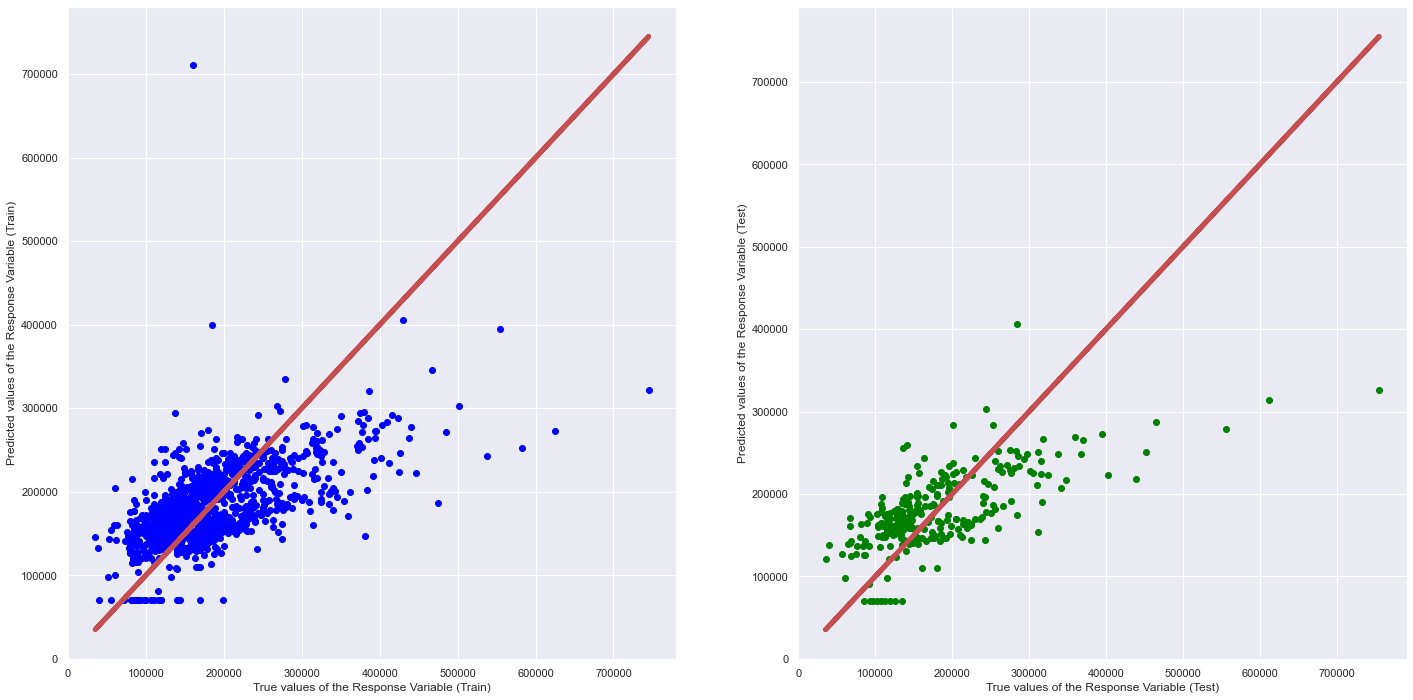

In [91]:
# Calling Function for 'SalePrice' and 'TotalBsmtSF'
conduct_linear_regression(X1,y1)

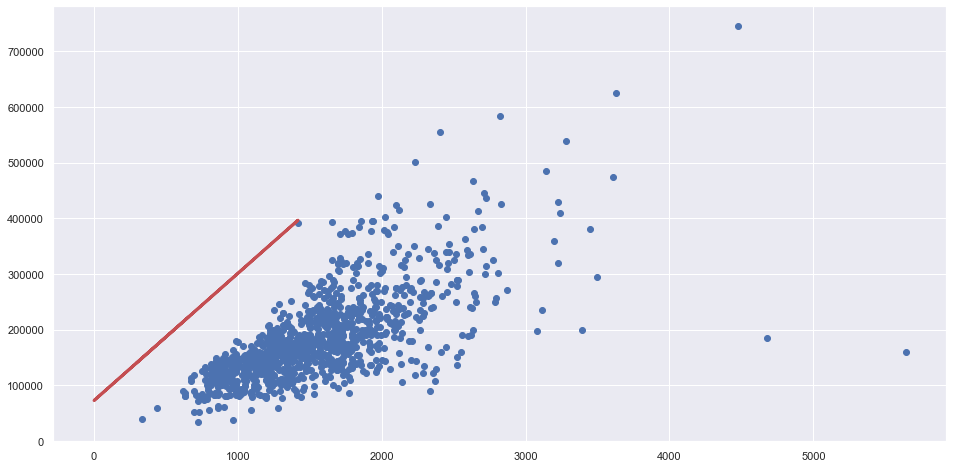

Intercept of Regression 	: b =  [72640.20697413]
Coefficients of Regression 	: a =  [[228.44274774]]

Goodness of Fit of Model(Train Dataset)
Explained Variance (R^2) 	: 0.38954934705845645
Mean Squared Error (MSE) 	: 3641063673.833633
Root Mean Squared Error (RMSE) 	: 60341.22698316329
Goodness of Fit of Model(Test Dataset)
Explained Variance (R^2) 	: 0.385149321555714
Mean Squared Error (MSE) 	: 4716105272.377991
Root Mean Squared Error (RMSE) 	: 68673.90532347778


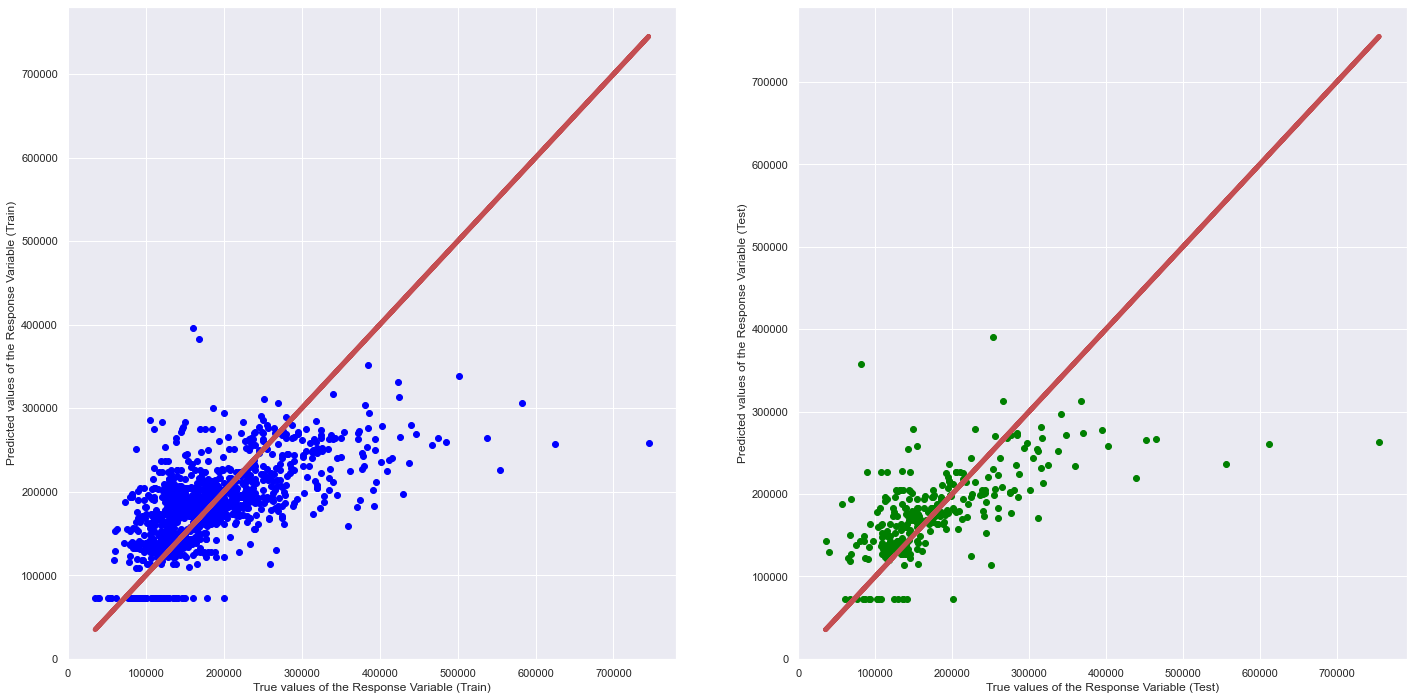

In [103]:
# Calling Function for 'SalePrice' and 'GarageArea'
conduct_linear_regression(X2,y2)

Model 1('SalePrice', 'GrLivArea')
Model 2('SalePrice' and 'TotalBsmtSF')
Model 3('SalePrice' and 'GarageArea')

Ans: From the data given, we can tell that Model 1 has a better fit with the raw data since the Explained Variance on the train set(R^2): 0.483931586143035 is higher than the other 2 models(Model 2:0.35732403271537017 and Model 3:0.38954934705845656). At the same time, Model 1 also have the smallest Root Mean Squared Error on the test set(RMSE): 58471.75652552955when compared to Model 2(66084.41263716131) and Model 3(68673.90532347778). This suggests that the linear regression Model 1 ('SalePrice' against 'GrLivArea') will be the best modelto go for since it has a better fit and lesser error as well

## Problem 3 : Refining the Models to Predict SalePrice
### In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.
#### Hints and Pointers
#### o In Part (a), there are houses that are outliers on both variables (intersection), but we really want the “union”.
#### o Part (b) is the same as Problem 1, just on the new outlier-free dataset. Check that the data now has less rows.
#### o Part (c) is the same as Problem 2, but keep in mind that the dataset has changed in this case, not the variables.

#### (a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

In [106]:
# create dataframe for SalePrice ad GrLivArea
SalePrice = pd.DataFrame(data['SalePrice'])
GrLivArea = pd.DataFrame(data['GrLivArea'])
jointDF = pd.concat([SalePrice, GrLivArea], axis = 1).reindex(GrLivArea.index)

Q1 = jointDF.quantile(0.25) 
Q3 = jointDF.quantile(0.75)

IQR = Q3 - Q1

clean = jointDF[~((jointDF < (Q1 - 1.5 * IQR)) |(jointDF > (Q3 + 1.5 * IQR))).any(axis=1)]
clean.describe()

,SalePrice,GrLivArea
count,1383.000000,1383.000000
mean,169306.211858,1453.518438
std,58693.656943,434.424442
min,34900.000000,334.000000
25%,128500.000000,1116.500000
50%,158500.000000,1431.000000
75%,202150.000000,1719.500000
max,340000.000000,2730.000000


In [107]:
clean

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


In [55]:
cleanSalePrice = pd.DataFrame(clean['SalePrice'])
cleanGrLivArea = pd.DataFrame(clean['GrLivArea'])
cleanSalePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


#### (b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

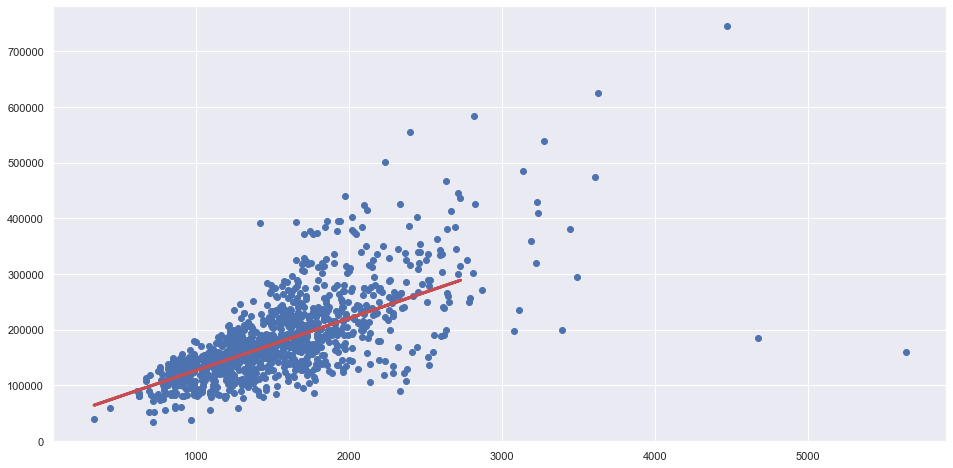

Intercept of Regression 	: b =  [32877.59542979]
Coefficients of Regression 	: a =  [[93.67698735]]

Goodness of Fit of Model(Train Dataset)
Explained Variance (R^2) 	: 0.4649331264429737
Mean Squared Error (MSE) 	: 1867348534.4372973
Root Mean Squared Error (RMSE) 	: 43212.82835498386
Goodness of Fit of Model(Test Dataset)
Explained Variance (R^2) 	: 0.5300058850175877
Mean Squared Error (MSE) 	: 1528812763.3595922
Root Mean Squared Error (RMSE) 	: 39100.035337063215


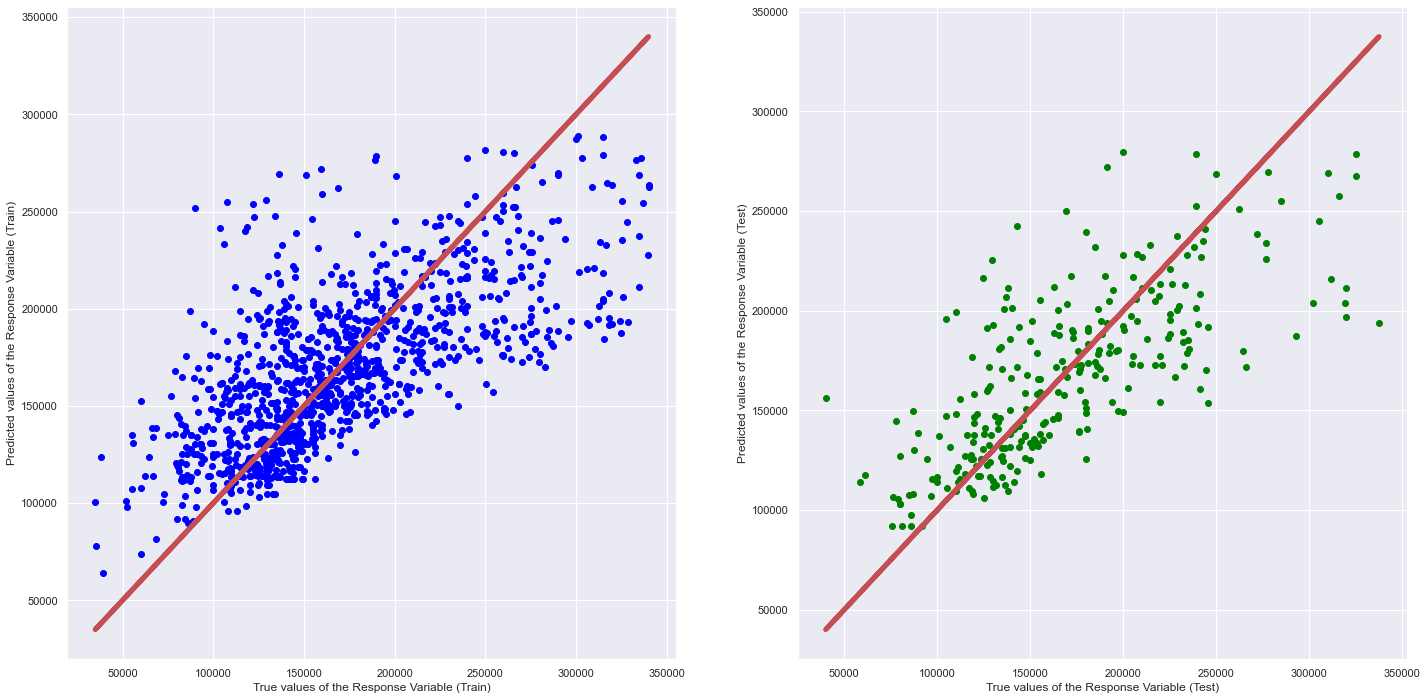

In [102]:
# Calling Function for 'SalePrice' and 'GrLivArea'

conduct_linear_regression(clean[['GrLivArea']],clean[['SalePrice']])

#### (c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

Ans: Yes. Outliers skew the coefficients. Coefficients are less biased than in problem 1, which willresult in smaller MSE for test dataset on average. This is supported by the values of MSE for thetest set in Problem 1(3418946311.180807) vs the MSE for the test set in Problem3(1528812763.3595922). While the Explained Variance on train set (R^2): 0.483931586143035 inproblem 1 vs Explained Variance on train set(R^2): 0.4649331264429736 in problem 3 seems tosuggest that the model in problem 1 seems to have a better fit, the difference in the variance isnot as significant as the difference in the mean square error. As such, i will justify that the model from problem 3 is better given that the prediction accuracy is significantly higher and the fit is
about the same for both models.